###                                                                                                                          Name: Sharon Laurance Muthipeedika 
###                                                                                                                          Matriculation No: 312486

# Exercise 2: Linear Regression through exact form

In [1]:
# Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt

#### 1. Generate a simple data i.e. a matrix X with dimensions 100×2. Initialize it with normal distribution µ = 2 and σ = 0.01

In [2]:
X = np.random.normal(2, 0.01, (100,2))

#### 2. Generate a simple target vector i.e. a matrix Y with dimensions 100 × 1. Initialize it with random uniform distribution.

In [3]:
Y=np.random.uniform(size=(100,1))

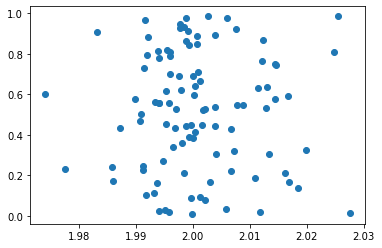

In [4]:
plt.scatter(X[:,0],Y) #Scatter Plot is drawn between X and Y

#### 3. Implement LEARN-SIMPLE-LINREG algorithm and train it using matrix X to learn values of β0 and β1

 ### For Simple Linear Regression:
 Given some data X,Y you need to learn the parameters required to learn the relation between both
 variables. For example as shown in the equation below you need to learn Beta0 (Bais) and Beta1.
 Given the above equation you can then calculate vector of Betas ( )using;
 Last step to obtain Betas is to divide by ( X transpose * X )or basically multiplying by (X transpose* X ) inverse.
 So in the end Beta can be calculated using;
 
$\beta = (X^T . X )^{-1} .( X^T . Y)$
    
 Theory is taken from Hint Provided

#### 4. An important aspect of this algorithm is solve the system of linear equations. Instead of solving the system of linear equations, here we ask you to invert the matrix A = XT X. The task hence involves implementing a subroutine for matrix inversion. Although it must be noted that inverting a matrix should always be avoided but as programming practice here we implement matrix inversion nevertheless.

In [5]:
#Inverse Function for a 2X2 Matrix only
def getDeterminant(m):
    return m[0][0]*m[1][1]-m[0][1]*m[1][0]
    
def find_Inverse(multiply_X_XT):
    m=multiply_X_XT
    determinant = getDeterminant(m)
    return [[m[1][1]/determinant, -1*m[0][1]/determinant],
            [-1*m[1][0]/determinant, m[0][0]/determinant]]
    

In [6]:
def linear_regression_model(X,Y):
    X_transpose=X.transpose()  #Find Transpose of X
    multiply_X_XT=np.dot(X_transpose,X) #Multiply X_transpose and X
    print(multiply_X_XT)
    A_Inverse=find_Inverse(multiply_X_XT) #Get Inverse of (𝑋𝑇.𝑋)−1
    A_Inverse=np.array(A_Inverse) #Convert to numpy array
    beta_vector=A_Inverse.dot(X_transpose.dot(Y)) #Get Beta Vector
    return beta_vector

##### Input Vector X is taken as domension (100X2). But padding of ones is done to ensure Beta0 remains constant value

In [7]:
X = np.random.normal(2, 0.01, (100,1))
A=np.ones((100,1))
X=np.hstack((X,A))
beta_vector=linear_regression_model(X,Y)

[[400.16739909 200.0394154 ]
 [200.0394154  100.        ]]


#### 5. Implement PREDICT-SIMPLE-LINREG and calculate the points for each training example in matrix A.

In [8]:
Y_Pred=np.dot(X,beta_vector)

#### 6. Plot the training points from matrix Y and predicted values in the form of scatter graph.

Text(0, 0.5, 'y')

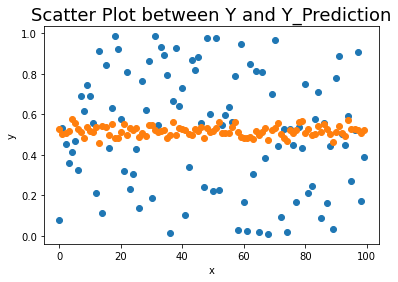

In [9]:
plt.scatter(list(range(100)),Y)
plt.scatter(list(range(100)),Y_Pred)
plt.title("Scatter Plot between Y and Y_Prediction",fontsize=18)
plt.xlabel('x')
plt.ylabel('y')

#### This shows the relation between X and Y_Prediction

Text(0.5, 1.0, 'Plot between Original Data and Fitted Line')

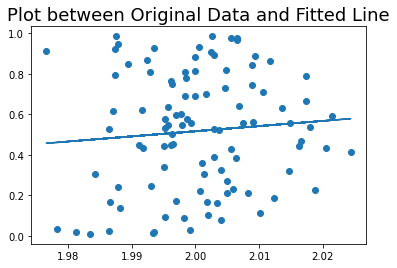

In [10]:
plt.scatter(X[:,0],Y)
plt.plot(X[:,0],Y_Pred)
plt.title("Plot between Original Data and Fitted Line",fontsize=18)

#### 7. In the end use numpy.linalg lstsq to replace step 2 for learning values of β0 and β1. linalg lstsq() function is used to return the least-squares solution to a linear equation

[2.54569385] [-4.57466668]


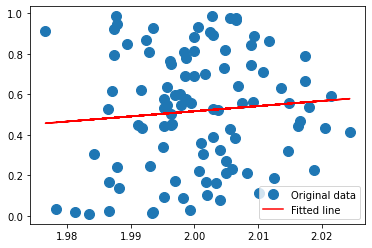

In [11]:
var1,var2 = np.linalg.lstsq(X, Y, rcond=None)[0] #Numpy linrary linalg.lstsq is used
print(var1,var2)
plt.plot(X[:,0], Y, 'o', label='Original data', markersize=10)
plt.plot(X[:,0], var1*X[:,0] +var2, 'r', label='Fitted line')
plt.legend()
plt.show()